In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV,train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, accuracy_score
import xgboost as xgb
import pickle

In [2]:
path = 'datacountstudents.csv'
data = pd.read_csv(path, sep = ',', na_filter = False)
data = data.set_index('id')
X_train = data.drop(columns = ['yC']).copy()
y_train = data[['yC']].copy()

In [3]:
path = 'count_test.csv'
test = pd.read_csv(path, sep = ',', na_filter = False)
X_test = test.drop(columns = ['yC']).copy()
y_test = test[['yC']].copy()

In [4]:
def calculated_metrics(variablesSelected,X_trained_scaled,y_train,X_test_scaled,y_test):
    X_trained_scaled_aux = X_trained_scaled[variablesSelected].copy()
    X_test_scaled_aux = X_test_scaled[variablesSelected].copy()
    regr = xgb.XGBRegressor(objective ='reg:squarederror')

    # Train the model using the training sets
    regr.fit(X_trained_scaled_aux,  y_train['yC'].values)

    # Make predictions using the testing set
    y_pred = regr.predict(X_test_scaled_aux)

    y_pred = pd.DataFrame(y_pred, index=y_test.index, columns=["y_pred"])
    y_pred = np.round(y_pred)

    total = y_pred.join(y_test)
    total['y_igual_0'] = (total['yC'] == 0).astype(int)
    total['y_pred_igual_0'] = (total['y_pred'] == 0).astype(int)
    total['good_class'] = (total['y_igual_0']==total['y_pred_igual_0']).astype(int)
    mse = mean_squared_error(y_test, y_pred)
    accuray = accuracy_score(total['y_igual_0'], total['y_pred_igual_0']) 
    return mse,accuray

In [ ]:
modelToProof = [['x2', 'x3', 'x4', 'x7', 'x8', 'x13', 'x14', 'x22', 'x24', 'x25', 'x27'],
                ['x3', 'x4', 'x7', 'x8', 'x9', 'x13', 'x14', 'x16', 'x18', 'x19', 'x22', 'x24', 'x25', 'x26', 'x27', 'x29', 'x30'],
                ['x2', 'x3', 'x4', 'x7', 'x8', 'x13', 'x14', 'x17', 'x22', 'x24', 'x25', 'x27'],
                ['x2', 'x3', 'x8', 'x9', 'x13', 'x14', 'x16', 'x18', 'x19', 'x22', 'x24', 'x25', 'x28', 'x30'],
                ['x3', 'x5', 'x8', 'x9', 'x13', 'x14', 'x16', 'x18', 'x22', 'x24', 'x25', 'x26', 'x27'],
                ['x3', 'x7', 'x9', 'x13', 'x14', 'x20', 'x22', 'x24', 'x25', 'x28'],
                ['x3', 'x5', 'x6', 'x7', 'x9', 'x15', 'x17', 'x18', 'x20', 'x24', 'x25', 'x27', 'x28'],
                ['x2', 'x4', 'x13', 'x26', 'x28'],
                ['x3', 'x4', 'x6', 'x9', 'x13', 'x14', 'x15', 'x17', 'x19', 'x22', 'x24', 'x25', 'x28', 'x30'],
                ['x1', 'x2', 'x4', 'x5', 'x7', 'x9', 'x13', 'x14', 'x18', 'x20', 'x22', 'x26', 'x27', 'x28', 'x30'],
                ['x3', 'x6', 'x8', 'x13', 'x14', 'x17', 'x20', 'x24', 'x25', 'x30'], 
                ['x2', 'x3', 'x5', 'x7', 'x8', 'x17', 'x19', 'x24', 'x25', 'x26', 'x27', 'x30'],
                ['x2', 'x3', 'x6', 'x7', 'x8', 'x9', 'x11', 'x13', 'x14', 'x15', 'x19', 'x24', 'x25', 'x26', 'x27', 'x30'],
                ['x4', 'x5', 'x15', 'x20', 'x26', 'x27', 'x28', 'x30'], 
                ['x2', 'x5', 'x9', 'x14', 'x22', 'x24', 'x25', 'x28'], 
                ['x1', 'x2', 'x3', 'x4', 'x6', 'x7', 'x9', 'x13', 'x14', 'x15', 'x17', 'x18', 'x19', 'x20', 'x22', 'x24', 'x25', 'x26', 'x28', 'x30'],
                ['x2', 'x3', 'x7', 'x8', 'x9', 'x11', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20', 'x22', 'x24', 'x25', 'x26', 'x27', 'x29', 'x30'],
                ['x1', 'x3', 'x4', 'x5', 'x6', 'x7', 'x9', 'x14', 'x15', 'x16', 'x18', 'x20', 'x21', 'x22', 'x25', 'x26', 'x28', 'x29', 'x30'],
                ['x3', 'x7', 'x24', 'x28', 'x29'],
                ['x3', 'x8', 'x9', 'x15', 'x16', 'x19', 'x25', 'x26', 'x28', 'x29', 'x30'],
                ['x3', 'x4', 'x8', 'x14', 'x17', 'x20', 'x24', 'x25', 'x30'],
                ['x1', 'x2', 'x3', 'x4', 'x5', 'x8', 'x9', 'x14', 'x15', 'x18', 'x20', 'x24', 'x25', 'x27', 'x28'],
                ['x2', 'x3', 'x5', 'x6', 'x13', 'x16', 'x22', 'x24', 'x25', 'x28', 'x30'],
                ['x2', 'x3', 'x5', 'x8', 'x14', 'x16', 'x17', 'x19', 'x24', 'x25', 'x28'],
                ['x2', 'x4', 'x5', 'x13', 'x14', 'x17', 'x20', 'x26', 'x29'],
                ['x3', 'x5', 'x6', 'x9', 'x13', 'x14', 'x15', 'x17', 'x18', 'x24', 'x25', 'x27', 'x28', 'x29'],
                ['x2', 'x4', 'x7', 'x13', 'x19', 'x20', 'x26', 'x28'],
                ['x3', 'x4', 'x6', 'x8', 'x12', 'x13', 'x14', 'x16', 'x17', 'x18', 'x21', 'x24', 'x25', 'x26', 'x27', 'x30'],
                ['x2', 'x3', 'x5', 'x7', 'x13', 'x14', 'x17', 'x18', 'x19', 'x20', 'x22', 'x24', 'x25', 'x26', 'x27', 'x28'],
                ['x3', 'x6', 'x9', 'x14', 'x15', 'x24', 'x25', 'x28'],
                ['x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x22', 'x24', 'x25', 'x26', 'x27', 'x28', 'x29', 'x30']]

In [ ]:
resultados =  pd.DataFrame()
mse_total =  pd.DataFrame()
accuracy_total =  pd.DataFrame()
for variablesTorun in modelToProof:
    print(variablesTorun)
    mse = []
    accuray = []
    if len(variablesTorun)>0:
        for j in range(1,1000):
            X_train_aux, X_test_aux, y_train_aux, y_test_aux = train_test_split(X_train, y_train, test_size=0.2)
            standarscaler = StandardScaler()
            X_trained_scaled_aux = standarscaler.fit_transform(X_train_aux)
            X_trained_scaled_aux = pd.DataFrame(X_trained_scaled_aux, index=X_train_aux.index, columns=X_train_aux.columns.values)

            X_test_scaled_aux = standarscaler.transform(X_test_aux)

            X_test_scaled_aux = pd.DataFrame(X_test_scaled_aux, index=X_test_aux.index, columns=X_test_aux.columns.values)

            variablesSelected = list(variablesTorun)
            mse_aux,accuray_aux= calculated_metrics(variablesSelected,X_trained_scaled_aux,y_train_aux,X_test_scaled_aux,y_test_aux)
            mse.append(mse_aux)
            accuray.append(accuray_aux)


        auxRes= pd.DataFrame({'Modelo': [variablesTorun], 'Median: Mean squared error': [np.median(np.asarray(mse))],'Median: Accuray': [np.median(np.asarray(accuray))]})
        resultados = pd.concat([resultados,auxRes])
        name = ','.join(variablesTorun)

        mse_total[name] = mse
        accuracy_total[name] = accuray
#         break
#         resultados.to_csv('ResultadosCV_scores.csv')
    else:
        print(f"El conjunto de variables {variablesTorun} no tiene variables")
#     break
# resultado_scores_ranking_cv.reset_index(inplace = True,drop = True)

In [18]:
resultados.sort_values('Median: Mean squared error')

,Modelo,Median: Mean squared error,Median: Accuray
0,"[x2, x3, x4, x7, x8, x13, x14, x22, x24, x25, ...",1.466667,0.633333
0,"[x3, x4, x6, x8, x12, x13, x14, x16, x17, x18,...",1.466667,0.633333
0,"[x2, x3, x4, x7, x8, x13, x14, x17, x22, x24, ...",1.466667,0.633333
0,"[x3, x7, x9, x13, x14, x20, x22, x24, x25, x28]",1.500000,0.633333
0,"[x3, x4, x8, x14, x17, x20, x24, x25, x30]",1.566667,0.600000
0,"[x3, x6, x9, x14, x15, x24, x25, x28]",1.566667,0.633333
0,"[x3, x6, x8, x13, x14, x17, x20, x24, x25, x30]",1.566667,0.633333
0,"[x2, x3, x4, x5, x6, x7, x8, x9, x13, x14, x15...",1.566667,0.633333
0,"[x3, x5, x8, x9, x13, x14, x16, x18, x22, x24,...",1.566667,0.633333
0,"[x2, x3, x8, x9, x13, x14, x16, x18, x19, x22,...",1.566667,0.600000


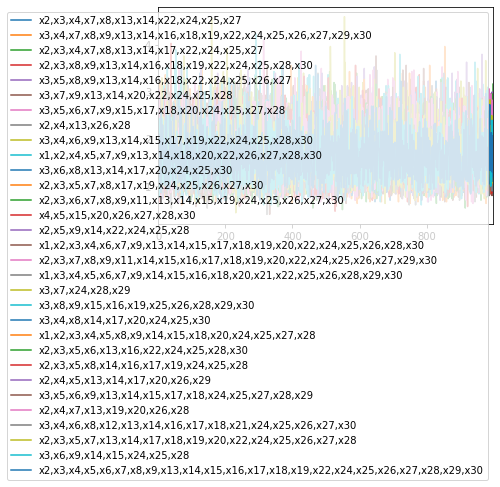

In [19]:
mse_total.plot()

In [20]:
mse_total.describe().T

,count,mean,std,min,25%,50%,75%,max
"x2,x3,x4,x7,x8,x13,x14,x22,x24,x25,x27",999.0,1.524491,0.418697,0.633333,1.200000,1.466667,1.800000,3.133333
"x3,x4,x7,x8,x9,x13,x14,x16,x18,x19,x22,x24,x25,x26,x27,x29,x30",999.0,1.632332,0.435257,0.600000,1.300000,1.600000,1.900000,3.966667
"x2,x3,x4,x7,x8,x13,x14,x17,x22,x24,x25,x27",999.0,1.512112,0.435746,0.500000,1.200000,1.466667,1.766667,3.400000
"x2,x3,x8,x9,x13,x14,x16,x18,x19,x22,x24,x25,x28,x30",999.0,1.631265,0.448861,0.466667,1.300000,1.566667,1.866667,3.366667
"x3,x5,x8,x9,x13,x14,x16,x18,x22,x24,x25,x26,x27",999.0,1.579680,0.400939,0.633333,1.300000,1.566667,1.833333,3.233333
"x3,x7,x9,x13,x14,x20,x22,x24,x25,x28",999.0,1.545245,0.446884,0.400000,1.200000,1.500000,1.833333,3.200000
"x3,x5,x6,x7,x9,x15,x17,x18,x20,x24,x25,x27,x28",999.0,1.667801,0.449063,0.633333,1.333333,1.633333,1.933333,3.533333
"x2,x4,x13,x26,x28",999.0,1.741542,0.477624,0.533333,1.400000,1.700000,2.066667,3.466667
"x3,x4,x6,x9,x13,x14,x15,x17,x19,x22,x24,x25,x28,x30",999.0,1.688522,0.439342,0.633333,1.366667,1.633333,1.966667,3.100000
"x1,x2,x4,x5,x7,x9,x13,x14,x18,x20,x22,x26,x27,x28,x30",999.0,1.851385,0.533185,0.600000,1.466667,1.800000,2.166667,4.233333


In [5]:
def training_model(variablesSelected,X_trained,y_train,X_test,y_test):
    X_trained_aux = X_trained[variablesSelected].copy()
    X_test_aux = X_test[variablesSelected].copy()
    ## Regresion para cada cantidad de variables
    model_to_return = {}
    model_to_return['variableSelected'] = variablesSelected
    
    pipeline = Pipeline(steps = [('standarscaled',StandardScaler()),
                                 ('xgboost',xgb.XGBRegressor(objective ='reg:squarederror'))])


    # Train the model using the training sets
    pipeline.fit(X_trained_aux,  y_train['yC'].values)

    # Make predictions using the testing set
    y_pred = pipeline.predict(X_test_aux)

    y_pred = pd.DataFrame(y_pred, index=y_test.index, columns=["y_pred"])
    y_pred = np.round(y_pred)

    total = y_pred.join(y_test)
    total['y_igual_0'] = (total['yC'] == 0).astype(int)
    total['y_pred_igual_0'] = (total['y_pred'] == 0).astype(int)
    total['good_class'] = (total['y_igual_0']==total['y_pred_igual_0']).astype(int)
    mse = mean_squared_error(y_test, y_pred)
    accuray = accuracy_score(y_test, y_pred) #total['good_class'].sum()/len(total)
    model_to_return['model'] = pipeline
    model_to_return['mse_test'] = mse
    model_to_return['accuray_test'] = accuray
    return model_to_return

## Modelo Final

In [6]:
variablesSelected = ['x2', 'x3', 'x4', 'x7', 'x8', 'x13', 'x14', 'x22', 'x24', 'x25', 'x27']

In [7]:
model_to_return = training_model(variablesSelected,X_train,y_train,X_test,y_test)

In [8]:
model_to_return

{'variableSelected': ['x2',
  'x3',
  'x4',
  'x7',
  'x8',
  'x13',
  'x14',
  'x22',
  'x24',
  'x25',
  'x27'],
 'model': Pipeline(memory=None,
          steps=[('standarscaled',
                  StandardScaler(copy=True, with_mean=True, with_std=True)),
                 ('xgboost',
                  XGBRegressor(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0,
                               importance_type='gain', learning_rate=0.1,
                               max_delta_step=0, max_depth=3, min_child_weight=1,
                               missing=None, n_estimators=100, n_jobs=1,
                               nthread=None, objective='reg:squarederror',
                               random_state=0, reg_alpha=0, reg_lambda=1,
                               scale_pos_weight=1, seed=None, silent=None,
                               subsample=1, verbosity=1))],
  

In [9]:
pickle.dump(model_to_return, open('modelCount.sav', 'wb'))